# KNN algorithm

In [86]:
from numpy import *
import operator
from os import listdir

In [82]:
def createDataset():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    label = ['A','A','B','B']
    return group, label

In [83]:
def knn(newPoint, dataset, labels, k):
    numPoint = dataset.shape[0] # row number
    
    # calculate Euclidean distance
    
    newArray = tile(newPoint, (numPoint,1)) #tile(a,(p,1)) repeat array a p times into p*1 matrix
    diff = newArray - dataset
    distance = (sum(diff**2,axis=1))**0.5
    
    # sort all the distances
    # argsort() returns the indices that would sort an array in a ascending order 
    sortedDistIndices = argsort(distance)
    
    # get first min k lables from input labels
    classcount = {}
    for i in range(k):
        votelabel = labels[sortedDistIndices[i]]
    
        # count times all labels occur in first k labels
    
        classcount[votelabel] = classcount.get(votelabel,0) + 1
    
    # get max count label in classcount
    maxi = 0
    for k,v in classcount.items():
        if v > maxi:
            maxi = v
            maxiIndex = k
            
    return maxiIndex
    
    # method 2, 用operator lib排序, 返回由tuple组成的list
    #sortedClassCount = sorted(classCount.iteritems(),
    #key=operator.itemgetter(1), reverse=True)
    #return sortedClassCount[0][0]

In [5]:
# test
dataset, labels = createDataset()
testdata = array([0.1,0.3])
k=3
testlabel = knn(testdata, dataset, labels, k)
print("the predicted lable is", testlabel)


the predicted lable is B


# Using KNN to improve dating matches

In [46]:
# read input text file and return data points and labels
def file2matrix(filename):
    f = open(filename)
    numLines = len(f.readlines())
    data = zeros((numLines, 3))
    classlabel = []
    f = open(filename)
    index=0
    for line in f.readlines():
        line = line.strip()
        parseline = line.split('\t') # split according to tab
        data[index,:] = parseline[0:3]
        classlabel.append(int(parseline[-1]))
        index+=1
    return data, classlabel

In [7]:
datingdata, classlabels = file2matrix('datingTestSet2.txt')

In [8]:
datingdata

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [9]:
classlabels[0:10]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3]

In [10]:
# Visulize the data
import matplotlib
import matplotlib.pyplot as plt

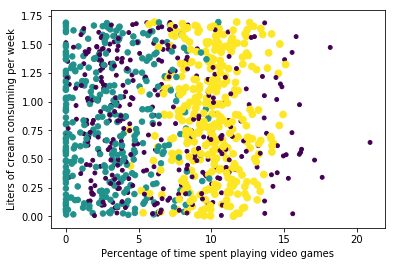

In [11]:
# plot second and third column of dataset
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingdata[:,1],datingdata[:,2],15.0*array(classlabels),15.0*array(classlabels))
plt.xlabel('Percentage of time spent playing video games')
plt.ylabel('Liters of cream consuming per week')
plt.show()

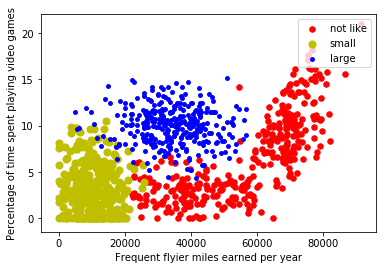

In [22]:
# plot first and second column of the data
fig2 = plt.figure() 
idx_1 = [i for i,v in enumerate(classlabels) if v==1] 
p1 = plt.scatter(datingdata[idx_1,0], datingdata[idx_1,1], color = 'r', label='not like', s = 30) 
idx_2 = [i for i,v in enumerate(classlabels) if v==2]
p2 = plt.scatter(datingdata[idx_2,0], datingdata[idx_2,1], color = 'y', label='small', s = 50) 
idx_3 = [i for i,v in enumerate(classlabels) if v==3]
p3 = plt.scatter(datingdata[idx_3,0], datingdata[idx_3,1], color = 'b', label='large', s = 15) 
plt.legend(loc = 'upper right')

#ax.scatter(datingdata[:,0],datingdata[:,1],14.0*array(classlabels),14.0*array(classlabels))
plt.xlabel('Frequent flyier miles earned per year')
plt.ylabel('Percentage of time spent playing video games')

plt.show()

In [33]:
# Normalize each variable to scale 0-1 or -1-1 to eliminate large data effect
def autoNorm(dataset):
    minVals = dataset.min(0)
    maxVals = dataset.max(0)
    ranges = maxVals-minVals
    
    normData = zeros(shape(datingdata))
    row = dataset.shape[0]
    normData = dataset - tile(minVals, (row,1))
    normData = normData/tile(ranges, (row,1))
    return normData, ranges, minVals

In [34]:
normData, ranges, minVals = autoNorm(datingdata)

In [35]:
normData

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [69]:
def datingClassTest():
    testRatio = 0.10
    datingdata,datinglabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingdata)
    numPoint= normMat.shape[0]
    numTestPoint = int(numPoint*testRatio)
    
    errorcount = 0.0
    for i in range(numTestPoint):
        classifierResult = knn(normMat[i,:], normMat[numTestPoint:numPoint,:], datinglabels[numTestPoint:numPoint],3)
        print("The classifier-predicted label is %d, the real label is %d"%(classifierResult, datinglabels[i]))
        
        if(classifierResult!=datinglabels[i]): errorcount+=1.0
    print("error rate is: %f"%(errorcount/float(numTestPoint)))
    

In [70]:
datingClassTest()

The classifier-predicted label is 3, the real label is 3
The classifier-predicted label is 2, the real label is 2
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label is 3, the real label is 3
The classifier-predicted label is 3, the real label is 3
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label is 3, the real label is 3
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label is 2, the real label is 2
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label is 1, the real label is 1
The classifier-predicted label 

# Hand Recognition system

In [75]:
def image2vector(filename):
    returnvec = zeros((1,1024))
    file = open(filename)
    for i in range(32):
        line = file.readline()
        for j in range(32):
            returnvec[0,i*32+j] = line[j]
    return returnvec

In [76]:
testvec = image2vector('testDigits/0_13.txt')

In [77]:
testvec

array([[0., 0., 0., ..., 0., 0., 0.]])

In [93]:
def handwritingTest():
    hwlabels = []
    trainingFilelist = listdir('trainingDigits')
    m = len(trainingFilelist)
    trainingSet = zeros((m, 1024))
    
    for i in range(m):
        filenamestr = trainingFilelist[i] # 0_19.txt
        filestr = filenamestr.split('.')[0] # 0_19
        classNum = int(filestr.split('_')[0]) # 0
        hwlabels.append(classNum)
        trainingSet[i,:] = image2vector('trainingDigits/%s'%filenamestr)
    
    testFilelist = listdir('testDigits')
    errorcount = 0.0
    mTest = len(testFilelist)
    for i in range(mTest):
        filenamestr = testFilelist[i] # 0_19.txt
        filestr = filenamestr.split('.')[0] # 0_19
        classNum = int(filestr.split('_')[0]) # 0
        
        testPoint = image2vector('testDigits\%s'%filenamestr)
        classResult = knn(testPoint, trainingSet, hwlabels, 3)
        
        print("The classifier result is %d, the real number is %d" %(classResult, classNum))
        if(classResult!=classNum): errorcount+=1.0
    print("\nthe total error number is %d" %errorcount)
    print("\nthe error rate is %lf"%(errorcount/float(mTest)))

In [94]:
handwritingTest()

The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier result is 0, the real number is 0
The classifier resul

The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 7, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 1, the real number is 1
The classifier result is 2, the real number is 2
The classifier result is 2, the real number is 2
The classifier result is 2, the real number is 2
The classifier result is 2, the real number is 2
The classifier resul

The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier result is 3, the real number is 3
The classifier resul

The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 3, the real number is 5
The classifier result is 6, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier result is 5, the real number is 5
The classifier resul

The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier result is 7, the real number is 7
The classifier resul

The classifier result is 8, the real number is 8
The classifier result is 8, the real number is 8
The classifier result is 8, the real number is 8
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 1, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier result is 9, the real number is 9
The classifier resul